<a href="https://colab.research.google.com/github/Louismada29/Image_Classification/blob/main/Louis_Madaerdo_Sotarjua_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Define Data Path

In [3]:
data_path = '/content/gdrive/MyDrive/Kaggle/Sports-celebrity images'

# Load Dataset and define Batch

In [4]:
# Define Batch and image size
batch_size = 32
img_height = 180
img_width = 180

In [5]:
# Call Training dataset
data = tf.keras.utils.image_dataset_from_directory(
    data_path, image_size=(img_height, img_width), batch_size=batch_size)

Found 441 files belonging to 4 classes.


# Check Classes Name

In [6]:
class_names = data.class_names
print(class_names)

['Kane Williamson', 'Kobe Bryant', 'Maria Sharapova', 'Ronaldo']


# Visualize Sample dataset

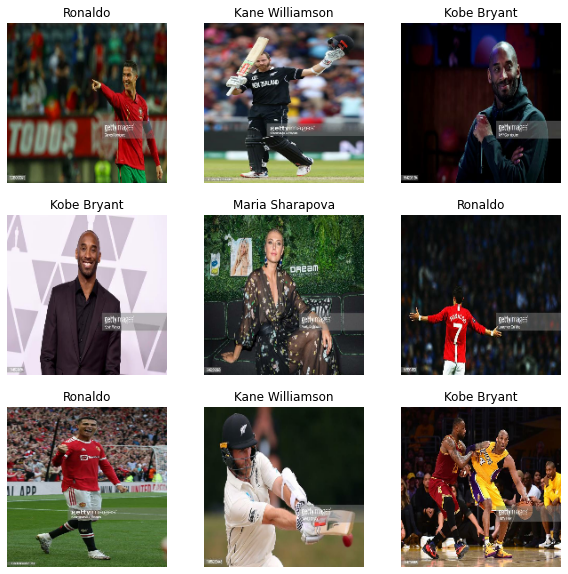

In [7]:
# Visualize data before training
plt.figure(figsize=(10, 10))
for images, labels in data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
# Compare batch image with batch label
for image_batch, labels_batch in data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


# Split Data to Train and Test Set

In [11]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_path, 
                                                                    batch_size = 32,
                                                                    image_size = (img_height, img_width),
                                                                    shuffle = True, 
                                                                    seed = 505,
                                                                    validation_split=0.1,
                                                                    subset = "training")
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_path, 
                                                                    batch_size = 32,
                                                                    image_size = (img_height, img_width),
                                                                    shuffle = True, 
                                                                    seed = 505,
                                                                    validation_split=0.1,
                                                                    subset = "validation")

Found 441 files belonging to 4 classes.
Using 397 files for training.
Found 441 files belonging to 4 classes.
Using 44 files for validation.


# Cache dataset to reduce training duration

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

# Create CNN Model

In [13]:
# Define Number of classes
num_classes = len(class_names)

In [14]:
# Create Model
model = Sequential([
    # Mencegah overfit dengan mempermainkan gambar
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),

    # Rescale ukuran dari 0-255 ke 0-1
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional Process
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Berguna untuk mencegah overfit dengan mematikan beberapa filter
    layers.Dropout(0.2),

    # Membuat kumpulan oixel menjadi satu dimensi
    layers.Flatten(),

    # Neural Network layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),

    # Memprediksi gambar ke sejumlah kelas (male, female)
    layers.Dense(num_classes)
])

In [15]:
# Compile model dan menentukan pengukuran error
model.compile(optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 180, 180, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 180, 180, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                      

In [18]:
# Mentraining Model dan menyimpan performance model ke dalam variable history
epochs=20
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs
)

Epoch 1/20
13/13 [==============================] - 27s 2s/step - loss: 0.7910 - accuracy: 0.6499 - val_loss: 0.7778 - val_accuracy: 0.6818
Epoch 2/20
13/13 [==============================] - 27s 2s/step - loss: 0.7909 - accuracy: 0.6826 - val_loss: 0.7567 - val_accuracy: 0.6818
Epoch 3/20
13/13 [==============================] - 26s 2s/step - loss: 0.7388 - accuracy: 0.7028 - val_loss: 0.6990 - val_accuracy: 0.7045
Epoch 4/20
13/13 [==============================] - 26s 2s/step - loss: 0.7139 - accuracy: 0.6927 - val_loss: 0.9187 - val_accuracy: 0.6818
Epoch 5/20
13/13 [==============================] - 26s 2s/step - loss: 0.7029 - accuracy: 0.7355 - val_loss: 0.8204 - val_accuracy: 0.7273
Epoch 6/20
13/13 [==============================] - 26s 2s/step - loss: 0.6506 - accuracy: 0.7280 - val_loss: 0.7551 - val_accuracy: 0.7273
Epoch 7/20
13/13 [==============================] - 26s 2s/step - loss: 0.5915 - accuracy: 0.7531 - val_loss: 1.0974 - val_accuracy: 0.6818
Epoch 8/20
13/13 [==

# Visualize Performance

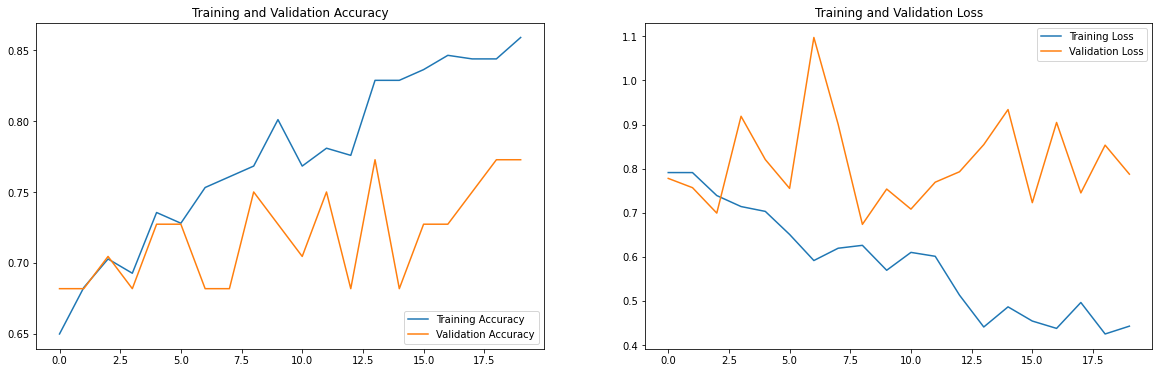

In [19]:
# Accuracy and Loss Visualization

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

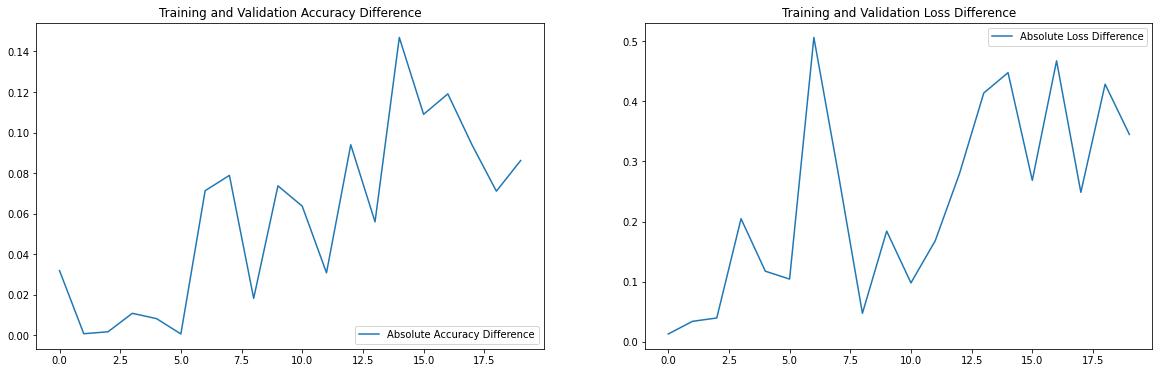

In [20]:
# The increase of difference trend means that the training tends to overfitting
acc_difference = abs(np.array(acc) - np.array(val_acc))
loss_difference = abs(np.array(loss) - np.array(val_loss))

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_difference, label='Absolute Accuracy Difference')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy Difference')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_difference, label='Absolute Loss Difference')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss Difference')
plt.show()

# Predict Image

This image most likely belongs to Ronaldo with a 100.00 percent confidence.


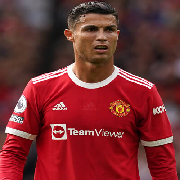

In [29]:
# Define path of the image
image_path = "/content/gdrive/MyDrive/Kaggle/13029.jpg"

# Load Image to tensorflow
img = tf.keras.utils.load_img(
    image_path, target_size=(img_height, img_width)
)

# Transform image into array
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

# Predict model
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Prediction Result
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

# Visualize Image
img